# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/pfgr/anaconda3/envs/py3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


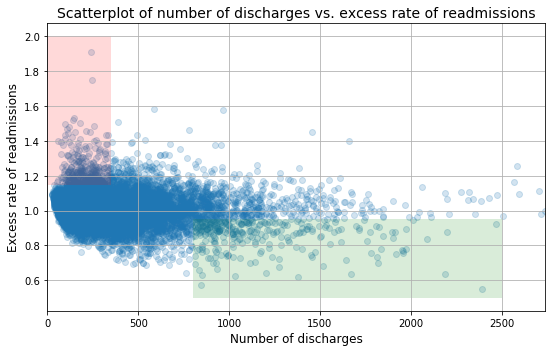

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

In [6]:
clean_hospital_read_df.iloc[-5, 7]

5.2000000000000002

In [7]:
clean_hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


In [8]:
discharges = 'Number of Discharges'
excess_readmissions = 'Excess Readmission Ratio'
data = clean_hospital_read_df[81:-3]

### A. Do you agree with the above analysis and recommendations? Why or why not?

In [9]:
per_read = len(data[data[excess_readmissions]>1]) / len(data)
read_mean = np.mean(data[excess_readmissions])
read_std = np.std(data[excess_readmissions])
print("Percentage of readmissions rate greater than 1: {:.3}%".format(per_read*100))
print("Mean excess readmission rate: {:.3}".format(read_mean))
print("Standard deviation for readmissions rate: {:.1}".format(read_std))

Percentage of readmissions rate greater than 1: 51.7%
Mean excess readmission rate: 1.01
Standard deviation for readmissions rate: 0.09


The analysis talks about a significant correlation between hospital capacity (number of discharges) and readmission rates without giving any solid prove about that. It just gives an example supporting the statement without explaining the rational for divding the data between a number of discahrges less than 100 and discharges greater than 1000. And even if we assume the reported correlation holds, the analyst doesn't prove causation or statistical significance on his conclusion.

Also the second point of the conclusion is not based on the data. It just seems to be only the opinion of the analyst. As well, the recommendations don't seems to be based on the data and the analyst sets a new category of number of discharges less than 300 that was not presented on the analysis.

Given the aformetioned reasons, I don't agree with the presented analysis and its recommendations.

In [10]:
#Pearson coefficient between excess rate of readmission and number of discharges
corr = np.corrcoef(data[discharges], data[excess_readmissions])
print("The Pearson coefficient between excess rate of readmission \
and number of discharges is: {:.3}".format(corr[0,1]))

The Pearson coefficient between excess rate of readmission and number of discharges is: -0.0931


As shown by the Pearson coefficient the correlation between the number of discharges and the percentage of readmissions is less than 10%.

In [11]:
#Pearson coefficient between number of readmissions and number of discharges
readmissions = 'Number of Readmissions'
corr = np.corrcoef(data[discharges], data[readmissions])
print("The Pearson coefficient between number of readmissions \
and number of discharges is: {:.3}".format(corr[0,1]))

The Pearson coefficient between number of readmissions and number of discharges is: 0.802


In [12]:
#Pearson coefficient between predicted readmission rate and number of discharges
predicted_readmissions = 'Predicted Readmission Rate'
corr = np.corrcoef(data[discharges], data[predicted_readmissions])
print("The Pearson coefficient between predicted readmission rate\
and number of discharges is: {:.3}".format(corr[0,1]))

The Pearson coefficient between predicted readmission rateand number of discharges is: -0.133


In [13]:
#Pearson coefficient between predicted readmission rate and number of readmissions
predicted_readmissions = 'Predicted Readmission Rate'
corr = np.corrcoef(data[readmissions], data[predicted_readmissions])
print("The Pearson coefficient between predicted readmission rate\
and number of readmissions is: {:.3}".format(corr[0,1]))

The Pearson coefficient between predicted readmission rateand number of readmissions is: 0.364


In [14]:
print("Number of hospitals with less than 100 discharges: {}".format(len(data[data[discharges]<100])))

Number of hospitals with less than 100 discharges: 1188


In [15]:
print("Number of hospitals with less than 100 discharges: {}".format(len(data[data[discharges]>1000])))

Number of hospitals with less than 100 discharges: 460


### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

#### 1. Setup an appropriate hypothesis test.

Null hypothesis: the hospitals with less than 100 discharges and the hospitals with discharges more than 1000 share the same mean for the excess readmissions ratio.

We set $\alpha = 0.01$ (if the p-values is less than this value, the NULL hypothesis is valid).

In [16]:
#Data for hospitals with number of discharges < 100
pop_100 = data[data[discharges]<100]
#Data for hospitals with number of discharges > 1000
pop_1000 = data[data[discharges]>1000]
#Data for hospitals with number of discharges >=100 & <= 1000
pop_rest = data[(data[discharges]>=100) & (data[discharges]<=1000)]
#Means on excess readmission ratio
mean_100 = np.mean(pop_100[excess_readmissions])
mean_1000 = np.mean(pop_1000[excess_readmissions])
#Mean difference between populations of interest
mean_diff = mean_100 - mean_1000
#Mean excess readmission ratio whole population
mean_all =np.mean(data[excess_readmissions])
#Shifted data
shift_100 = pop_100[excess_readmissions] - mean_100 + mean_all
shift_1000 = pop_1000[excess_readmissions] - mean_1000 + mean_all

In [17]:
#1000000 Bootstraps
n = 1000000
bs_replica = np.empty(n)
np.random.seed(42)
for i in range(n):
    permut = np.random.permutation(data[excess_readmissions])
    new_100 = permut[:len(pop_100)]
    new_1000 = permut[-len(pop_1000):]
    bs_replica[i] = np.mean(new_100) - np.mean(new_1000)

#### 2. Compute and report the observed significance value (or p-value).

In [18]:
#p-value
p = np.sum(bs_replica >= mean_diff) / len(bs_replica)
print("The p-value for the null hypothesis is: {}".format(p))

The p-value for the null hypothesis is: 0.0


#### 3. Report statistical significance for $\alpha$ = .01. 

We obtained $p < \alpha$, this means that the observed difference in mean excess readmissions ratio for hospitals with less than 100 discharges and hospitals with more than 1000 discharges has no statistical significance.

#### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

In the provided data there is a clear difference in the mean excess readmissions ratio for hospitals with less than 100 discharges and hospitals with more than 1000 discharges. This indicates that there is a practical significance in the excess readmissions ratio reported. At the same time we see that the number of hospitals with less than 100 discharges represents more than the double of the number of hospitals with more than 1000 discharges. This may indicate that the practical significance we see in the mean excess readmissions ratio difference is due to the fact that we don't have enough data from big hospitals. 

For the reason mentioned above we had to apply bootstrapping to check if the defined practical significance has also a statistical significance. From question 3. we reported that there is no statistical significance on the mean excess readmissions ratio for hospitals with less than 100 discharges and hospitals with more than 1000 discharges. Then, in this particular case the statistical significance and the practical significance differ from each other.

This eliminates the recommendation to the client based on hospital size and another hypothesis needs to be proposed.


#### 5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?

The advantage of the scatter plot presented above is that it shows all the data, so quick insights may be drawn for it. However presenting all the data is also its main disadvantge because it doesn't give any tangible value on the differences shown. 

      - Construct another plot that conveys the same information in a more direct manner.

In [57]:
#Create new column in dataset containing the hospital size 
#as defined in the analysis the size is related to the number of discharges
size = []
for i in range(len(data)):
    if data[discharges].iloc[i] < 100:
        size.append('<100')
    elif data[discharges].iloc[i] > 1000:
        size.append('>1000')
    else:
        size.append('100 to 1000')
#New column in data set        
data['size'] = size
#Set as categorical for plotting
data['size'] = data['size'].astype('category')

/home/pfgr/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/pfgr/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

/home/pfgr/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/home/pfgr/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


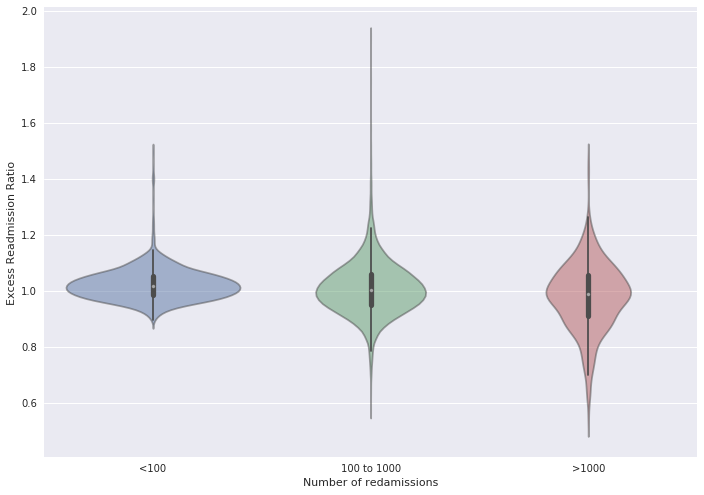

In [62]:
ax1 = sns.violinplot(x='size', y=excess_readmissions, data=data, order=['<100', '100 to 1000', '>1000'] )
_ = plt.setp(ax1.collections, alpha=.5)
#ax2 = sns.swarmplot(x='size', y=excess_readmissions, data=data, order=['<100', '100 to 1000', '>1000'])
#_ = plt.setp(ax2.collections, alpha=.3)
plt.xlabel('Number of redamissions')
plt.show()